# Analyzing Data from Multiple Files

In [3]:
import glob
print(glob.glob('inflammation*.csv'))

['inflammation-05.csv', 'inflammation-11.csv', 'inflammation-10.csv', 'inflammation-04.csv', 'inflammation-12.csv', 'inflammation-06.csv', 'inflammation-07.csv', 'inflammation-03.csv', 'inflammation-02.csv', 'inflammation-01.csv', 'inflammation-09.csv', 'inflammation-08.csv']


As can be seen above, `glob.glob` returns a list with all files in the current working directory that starts with `inflammation` and ends in `.csv`. 

inflammation-01.csv


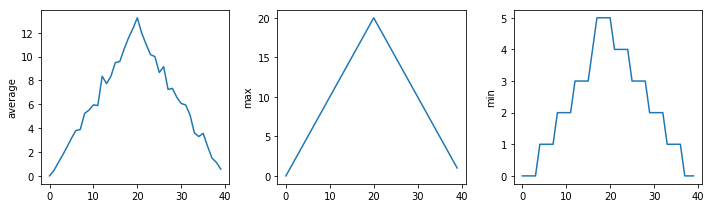

inflammation-02.csv


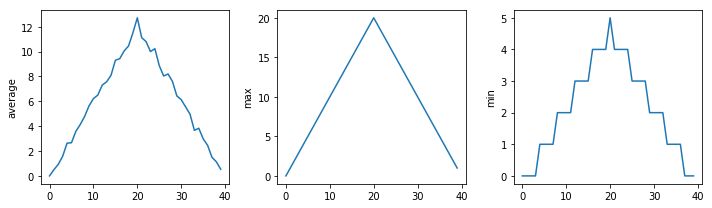

inflammation-03.csv


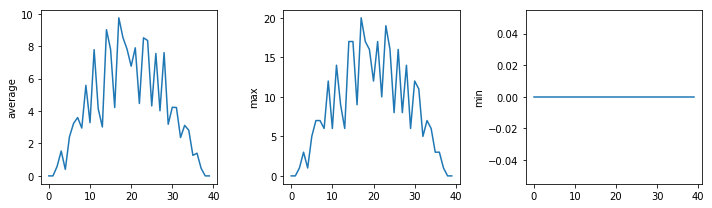

In [5]:
import numpy
import matplotlib.pyplot

%matplotlib inline

filenames = sorted(glob.glob('inflammation*.csv'))
filenames = filenames[0:3]
for f in filenames:
    print(f)

    data = numpy.loadtxt(fname=f, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

## Plotting Differences

Plot the difference between the average of the first dataset and the average of the second dataset, i.e., the difference between the leftmost plot of the first two figures.

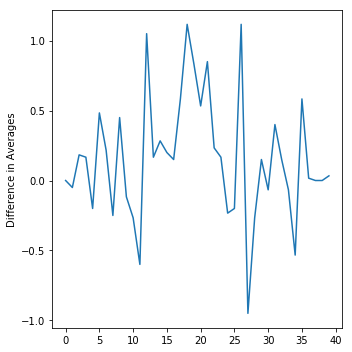

In [37]:
data_1 = numpy.loadtxt(fname = filenames[0], delimiter = ",")
data_2 = numpy.loadtxt(fname = filenames[1], delimiter = ",")

fig = matplotlib.pyplot.figure(figsize = (5,5))
matplotlib.pyplot.ylabel('Difference in Averages')
matplotlib.pyplot.plot(numpy.mean(data_1, axis = 0) - numpy.mean(data_2, axis = 0))

fig.tight_layout()
matplotlib.pyplot.show()

## Generate Composite Statistics

Use each of the files once to generate a dataset containing values averaged over all patients:

In [71]:
filenames = glob.glob('inflammation*.csv')

# Create array to hold all averages
composite_data = numpy.zeros((60,40))

for i in range(0, len(filenames)):
    data = numpy.loadtxt(fname = filenames[i], delimiter = ",")
    composite_data += data
    
composite_data /= len(filenames)

print(composite_data)

[[0.         0.33333333 0.58333333 ... 1.16666667 0.66666667 0.33333333]
 [0.         0.58333333 0.66666667 ... 1.16666667 0.5        0.41666667]
 [0.         0.5        1.08333333 ... 0.75       0.75       0.58333333]
 ...
 [0.         0.33333333 1.5        ... 1.33333333 0.91666667 0.41666667]
 [0.         0.33333333 0.75       ... 1.08333333 0.75       0.41666667]
 [0.         0.16666667 0.91666667 ... 1.5        0.58333333 0.41666667]]


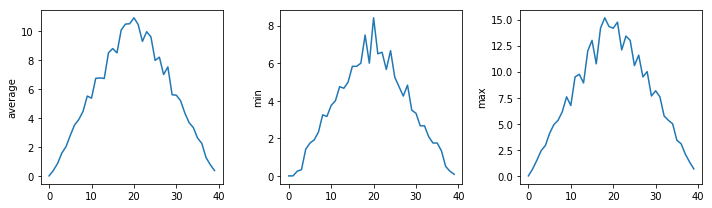

In [76]:
fig = matplotlib.pyplot.figure(figsize = (10, 3))

axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.set_ylabel('average')
axes2.set_ylabel('min')
axes3.set_ylabel('max')

axes1.plot(numpy.mean(composite_data, axis=0))
axes2.plot(numpy.min(composite_data, axis=0))
axes3.plot(numpy.max(composite_data, axis=0))

fig.tight_layout()
matplotlib.pyplot.show()